Noms i NIU dels integrants:
  - **Nom:** David Morillo Massagué
  - **NIU:** 1666540
  - **Nom:** Adrià Muro Gómez
  - **NIU:** 1665191
  - **Nom:** Lucia Garrido Rosas
  - **NIU:** 1671463

## Dataset utilitzat:

https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset 

## Llibreries utilitzades

In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

## Càrrega i pre-processament de les dades

In [3]:
# Import the data
datafile = "data/healthcare-dataset-stroke-data.csv"

# Load the data
df = pd.read_csv(datafile)

# Preprocess the data
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df["ever_married"] = df["ever_married"].map({'Yes': 1, 'No': 0})
df['stroke'] = df['stroke'].astype('category').cat.codes

# Convert columns to categorical using one-hot encoding
df = pd.get_dummies(df, columns=['smoking_status', "work_type", "Residence_type"])

# Define features and target again after encoding
X = df.drop(columns=['id', 'stroke'])
y = df['stroke']

# Split the data again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Creació i test de l'arbre de decissió

In [4]:
# Train the decision tree model again
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions again
y_pred = clf.predict(X_test)

# Evaluate the model again
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9158512720156555


## Visualització de l'arbre de decisió

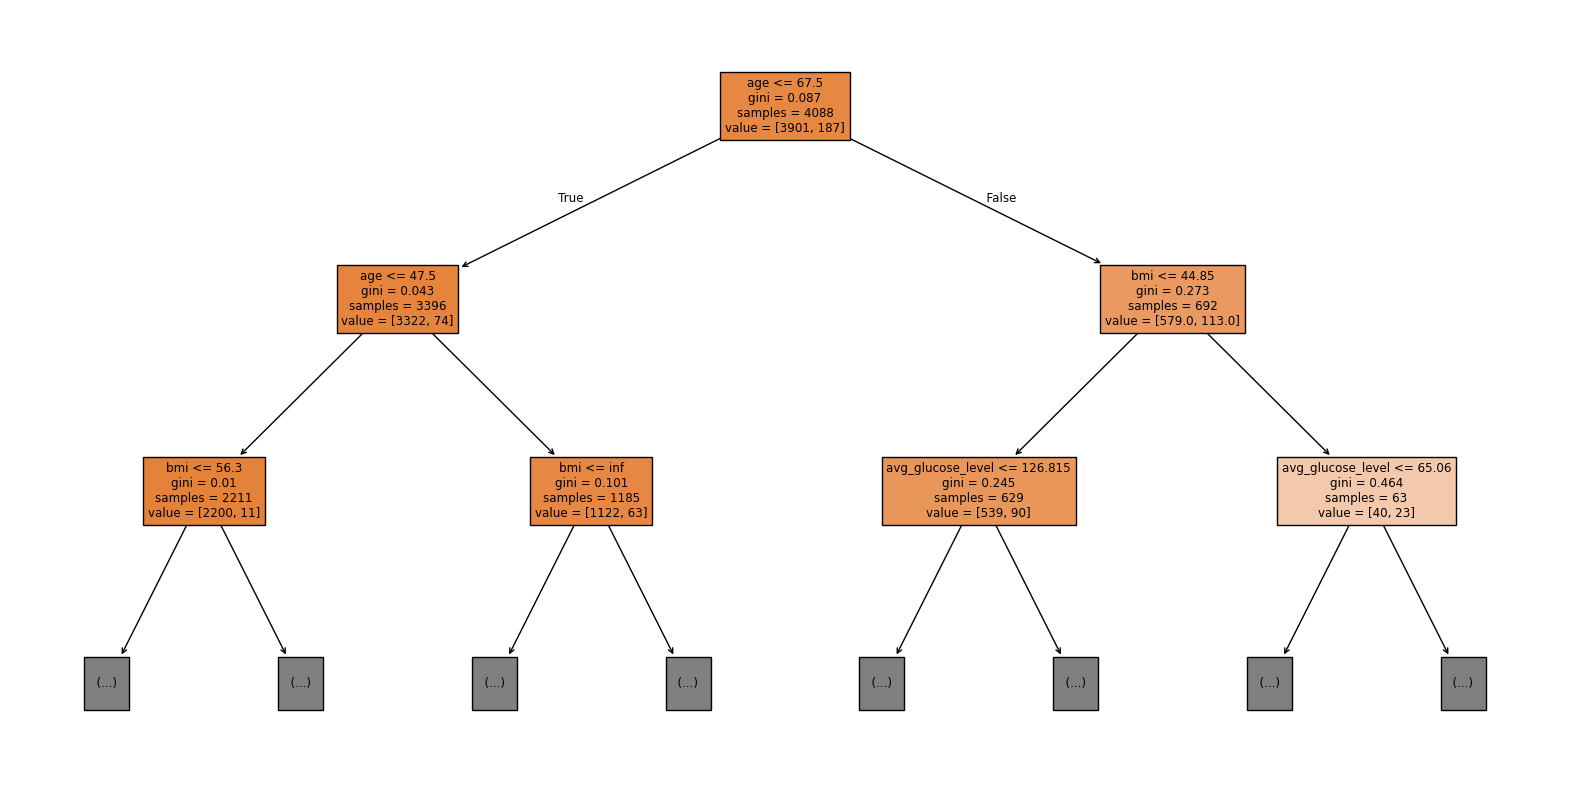

In [5]:
# Mostrar arbre
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, max_depth=2)
plt.show()

## Visualització dels factors més importants pel model

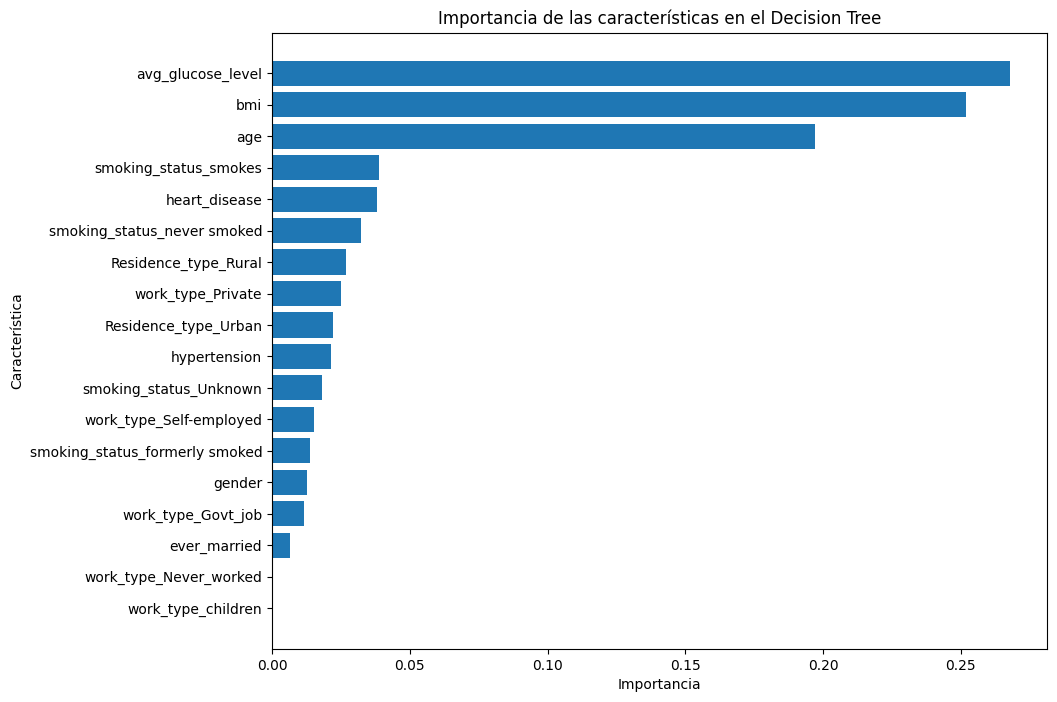

In [6]:
# Obtener la importancia de las características
feature_importances = clf.feature_importances_

# Crear un DataFrame para facilitar la visualización
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Ordenar el DataFrame por importancia
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las características en el Decision Tree')
plt.gca().invert_yaxis()
plt.show()

## Li treiem les tres característiques més importants segons el gràfic generat

In [7]:
X = df.drop(columns=['id', 'stroke', "bmi", "avg_glucose_level", "age"])
y = df['stroke']

# Split the data again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree model again
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions again
y_pred = clf.predict(X_test)

# Evaluate the model again
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9363992172211351


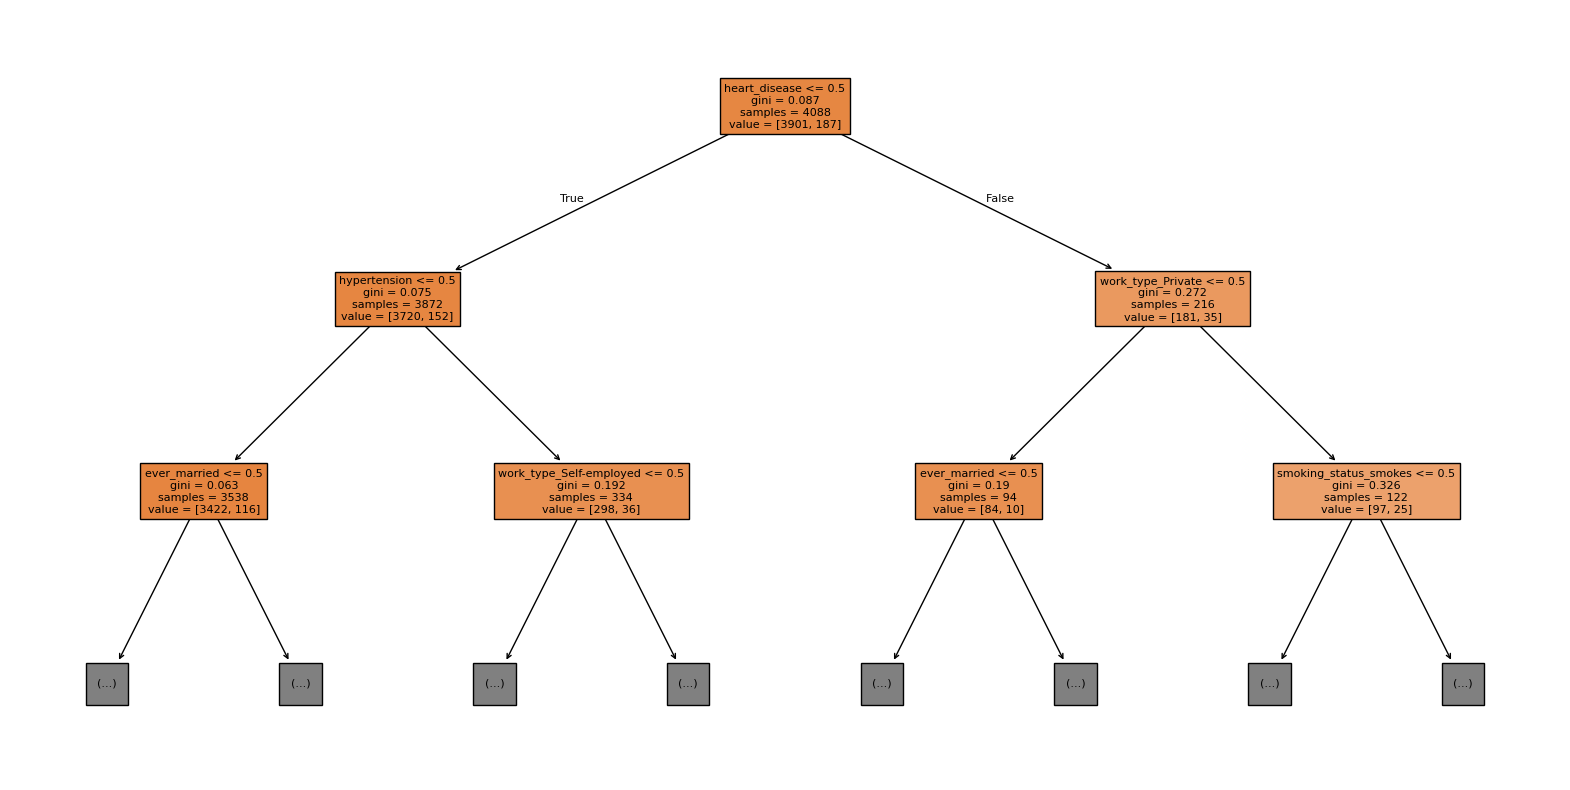

In [8]:
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, max_depth=2)
plt.show()

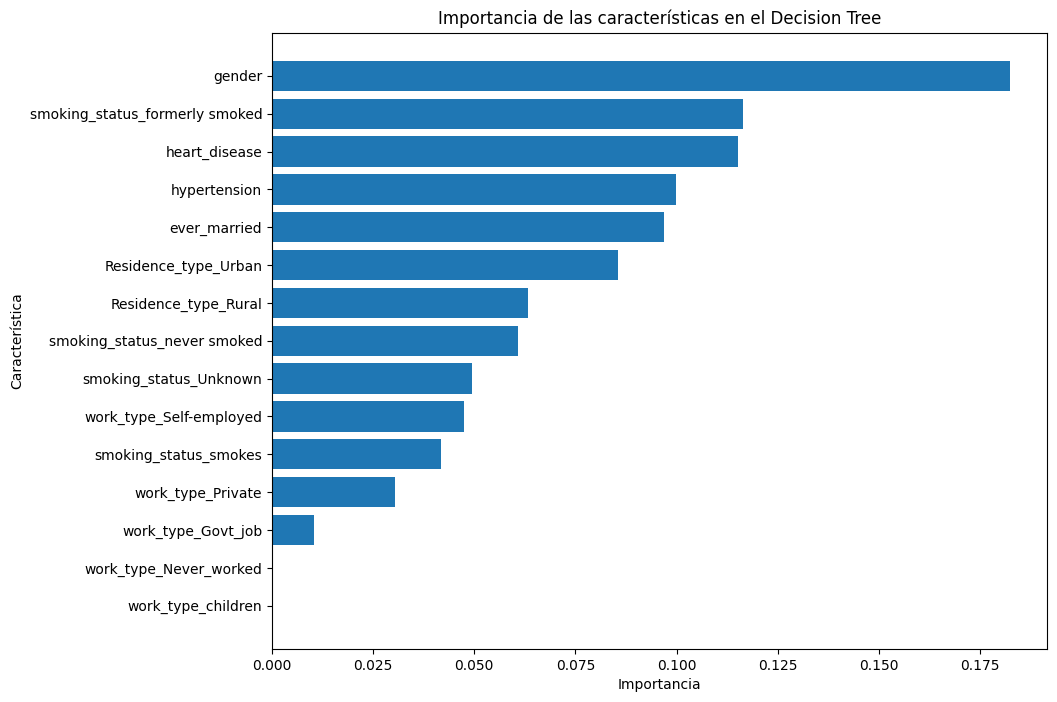

In [9]:
# Obtener la importancia de las características
feature_importances = clf.feature_importances_

# Crear un DataFrame para facilitar la visualización
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Ordenar el DataFrame por importancia
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las características en el Decision Tree')
plt.gca().invert_yaxis()
plt.show()